''' <br/>
FEATURE ENGINEERING <br/>
    Feature engineering is a technique that leverages data to create new variables that aren't in the 
training set and converts raw data into a format that can be used for building the machine learning  model. <br/>
It can produce new features for both supervised and unsupervised learning, with the goal of 
simplifying and speeding up data transformations <br/>
while <br/>also enhancing the performance of the machine learning model.<br/>
'''

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns
%matplotlib inline


### Section-1 (a)

In [2]:
df = pd.read_excel('Datasets\Housing.xlsx')

# df = pd.read_excel('Housing.xlsx')

### For csv file we use this command
# df = pd.read_csv('Datasets\Churn_Modelling.csv')
# df = pd.read_csv('Datasets\wine.csv')
print(df.shape)
df.tail(10)

(551, 13)


,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
541,542,91500,4800,3.0,2,4,yes,yes,no,no,yes,0,no
542,543,94000,6000,3.0,2,4,yes,no,no,no,yes,0,no
543,544,103000,6000,3.0,2,4,yes,yes,no,no,yes,1,no
544,545,105000,6000,3.0,2,2,yes,yes,no,no,yes,1,no
545,546,105000,6000,3.0,1,2,yes,no,no,no,yes,1,no
546,500,65000,8400,4.0,1,4,yes,no,no,no,no,3,no
547,501,67900,6440,2.0,1,1,yes,no,no,no,yes,3,no
548,502,68500,8100,4.0,1,4,yes,no,yes,no,yes,2,no
549,503,70000,6720,3.0,1,1,yes,no,no,no,no,0,no
550,504,70500,5948,3.0,1,2,yes,no,no,no,yes,0,no


In [3]:
print(df.dtypes)
print(df.columns)

print(len(df.columns))

Unnamed: 0      int64
price           int64
lotsize         int64
bedrooms      float64
bathrms         int64
stories         int64
driveway       object
recroom        object
fullbase       object
gashw          object
airco          object
garagepl        int64
prefarea       object
dtype: object
Index(['Unnamed: 0', 'price', 'lotsize', 'bedrooms', 'bathrms', 'stories',
       'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl',
       'prefarea'],
      dtype='object')
13


In [4]:
df['bedrooms'].unique()

array([ 3.,  2., nan,  4.,  1.,  5.,  6.])

In [5]:
''' Changing data type using astype'''
df['driveway']= df['driveway'].astype('category')
df['recroom']= df['recroom'].astype('category')
df['fullbase'] = df['fullbase'].astype('category') 
### May be done for other features if need be.

# df['bedrooms'] = df['bedrooms'].astype('int64')

In [6]:
### Verify
print(df.dtypes)

Unnamed: 0       int64
price            int64
lotsize          int64
bedrooms       float64
bathrms          int64
stories          int64
driveway      category
recroom       category
fullbase      category
gashw           object
airco           object
garagepl         int64
prefarea        object
dtype: object


In [7]:
df["driveway"].value_counts()

yes    460
no      77
Name: driveway, dtype: int64

In [8]:
df["driveway"].unique()

[NaN, 'no', 'yes']
Categories (2, object): ['no', 'yes']

In [9]:
# print(df)
print(df.shape)
# print(df.columns)

(551, 13)


In [10]:
### Check for duplicates
df.duplicated().sum()

5

In [11]:
df[ df.duplicated() ]  

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
546,500,65000,8400,4.0,1,4,yes,no,no,no,no,3,no
547,501,67900,6440,2.0,1,1,yes,no,no,no,yes,3,no
548,502,68500,8100,4.0,1,4,yes,no,yes,no,yes,2,no
549,503,70000,6720,3.0,1,1,yes,no,no,no,no,0,no
550,504,70500,5948,3.0,1,2,yes,no,no,no,yes,0,no


In [12]:
#### NO NEED TO REMOVE DUPLICATES
# #Return a boolean if any row is a duplicate
# print(df.duplicated().any())

# # # Check for duplicates and sum 
# print(df.duplicated().sum())

# # #To return the the rows that is duplicated using index
# print(df[df.duplicated()]) 
# df.shape

# # Remove duplicates if need be
df = df.drop_duplicates( keep='last')

df.shape

(546, 13)

In [13]:
df

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000,5850,3.0,1,2,NaN,no,yes,no,no,1,no
1,2,38500,4000,2.0,1,1,NaN,no,no,no,no,0,no
2,3,49500,3060,NaN,1,1,NaN,no,no,no,no,0,no
3,4,60500,6650,NaN,1,2,NaN,yes,no,no,no,0,no
4,5,61000,6360,2.0,1,1,NaN,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,500,65000,8400,4.0,1,4,yes,no,no,no,no,3,no
547,501,67900,6440,2.0,1,1,yes,no,no,no,yes,3,no
548,502,68500,8100,4.0,1,4,yes,no,yes,no,yes,2,no
549,503,70000,6720,3.0,1,1,yes,no,no,no,no,0,no


In [14]:
df.reset_index(inplace=True)
df.tail()

,index,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
541,546,500,65000,8400,4.0,1,4,yes,no,no,no,no,3,no
542,547,501,67900,6440,2.0,1,1,yes,no,no,no,yes,3,no
543,548,502,68500,8100,4.0,1,4,yes,no,yes,no,yes,2,no
544,549,503,70000,6720,3.0,1,1,yes,no,no,no,no,0,no
545,550,504,70500,5948,3.0,1,2,yes,no,no,no,yes,0,no


In [15]:
df.drop(['index', 'Unnamed: 0' ], axis=1,inplace=True)


In [16]:
df.tail()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
541,65000,8400,4.0,1,4,yes,no,no,no,no,3,no
542,67900,6440,2.0,1,1,yes,no,no,no,yes,3,no
543,68500,8100,4.0,1,4,yes,no,yes,no,yes,2,no
544,70000,6720,3.0,1,1,yes,no,no,no,no,0,no
545,70500,5948,3.0,1,2,yes,no,no,no,yes,0,no


### Handling Missing values (NaN)

### Cheking Null vaues in dataframe
[pandas: Extract rows/columns with missing values (NaN)](https://note.nkmk.me/en/python-pandas-nan-extract/#:~:text=source%3A%20pandas_nan_extract.py-,Extract%20rows%2Fcolumns%20with%20missing%20values%20in%20specific%20columns%2Frows,a%20missing%20value%20or%20not.&text=isnull()%20is%20an%20alias,whose%20usage%20is%20the%20same.)

In [17]:
# Handling Missing values (NaN)
# print(df.isna())
# print(df.isnull())
## To get summary of null values in each column
# print(df.isna().sum()) 
print(df.isnull().sum())

price        0
lotsize      0
bedrooms    14
bathrms      0
stories      0
driveway    14
recroom      0
fullbase     0
gashw        0
airco        0
garagepl     0
prefarea     0
dtype: int64


In [18]:
df.mean(numeric_only=True)

price       68121.597070
lotsize      5150.265568
bedrooms        2.964286
bathrms         1.285714
stories         1.807692
garagepl        0.692308
dtype: float64

In [19]:
print(df['bedrooms'].mean())
print(round(df['bedrooms'].mean()))

2.9642857142857144
3


In [20]:
df[ df['bedrooms'].isna() ].index

Int64Index([2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 16, 22, 28, 29], dtype='int64')

[Handling Missing/Null values](https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e)

In [21]:
# df['bedrooms'].fillna(value = 30)  
# df['bedrooms'].fillna(value = 'missing')

new_val = df['bedrooms'].mean()
new_val = round(df['bedrooms'].mean())

df['bedrooms'].fillna(value = new_val)
# df['bedrooms'].fillna(value = new_val, inplace=True)                    

0      3.0
1      2.0
2      3.0
3      3.0
4      2.0
      ... 
541    4.0
542    2.0
543    4.0
544    3.0
545    3.0
Name: bedrooms, Length: 546, dtype: float64

In [22]:
print(df.isna().sum())

price        0
lotsize      0
bedrooms    14
bathrms      0
stories      0
driveway    14
recroom      0
fullbase     0
gashw        0
airco        0
garagepl     0
prefarea     0
dtype: int64


In [23]:
## To update actual dataframe
df['bedrooms'] = df['bedrooms'].fillna(value = round(df['bedrooms'].mean()))

# df.loc[  index_list, 'bedrooms' ] = round(df['bedrooms'].mean())
df.isna().sum()

# # print(df.tail(10))

# print(df.isna().sum())

price        0
lotsize      0
bedrooms     0
bathrms      0
stories      0
driveway    14
recroom      0
fullbase     0
gashw        0
airco        0
garagepl     0
prefarea     0
dtype: int64

In [24]:
### Get mode value in variable mod_value
mod_value = df['driveway'].mode()
print(type(mod_value))   ### It is series

# print(df['driveway'].value_counts())
# ### Display mode value using this
print(mod_value)
print(mod_value[0])

<class 'pandas.core.series.Series'>
0    yes
Name: driveway, dtype: category
Categories (2, object): ['no', 'yes']
yes


In [25]:
### Assign mode value at null positions in 'Embarked' column
df['driveway'] = df['driveway'].fillna(value = mod_value[0])

### Verify
print(df.isnull().sum())

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64


In [26]:
# removing all rows containing at least 1 null value
# df.dropna()

# removing only rows with all null values
# df.dropna(axis = 0, how='any')

# Removing columns having not even 300 non-null values
df.dropna( axis=1, thresh = 540, inplace=True)   ## To drop columns with missing values- Set 'axis' parameter to 1
                                                 ## To do update permanently (Set 'inplace' parameter)
# df.dropna(inplace=True)
print(df.shape)
df


(546, 12)


,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000,5850,3.0,1,2,yes,no,yes,no,no,1,no
1,38500,4000,2.0,1,1,yes,no,no,no,no,0,no
2,49500,3060,3.0,1,1,yes,no,no,no,no,0,no
3,60500,6650,3.0,1,2,yes,yes,no,no,no,0,no
4,61000,6360,2.0,1,1,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
541,65000,8400,4.0,1,4,yes,no,no,no,no,3,no
542,67900,6440,2.0,1,1,yes,no,no,no,yes,3,no
543,68500,8100,4.0,1,4,yes,no,yes,no,yes,2,no
544,70000,6720,3.0,1,1,yes,no,no,no,no,0,no


In [27]:
print(df.isnull().sum())

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64


### Handling Outliers
[Working with Outliers](https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/#:~:text=For%20data%20that%20follows%20a,faulty%20equipment%2C%20or%20poor%20sampling.)

In [28]:
# Handling Outliers
df.describe()


,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [29]:
### Selective features Descriptive Statistics
df.describe()[ ['bedrooms', 'stories'] ]

,bedrooms,stories
count,546.000000,546.000000
mean,2.965201,1.807692
std,0.737388,0.868203
min,1.000000,1.000000
25%,2.000000,1.000000
50%,3.000000,2.000000
75%,3.000000,2.000000
max,6.000000,4.000000


### Outlier Detection

<AxesSubplot:ylabel='price'>

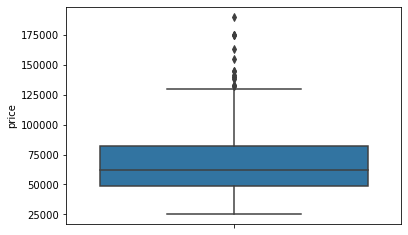

In [30]:
# sns.displot(df['Fare'], kde= False, bins = 20)
sns.boxplot(y='price', data= df )

In [31]:
### STATISTICAL METHOD TO COMPUTE THE UPPER AND LOWER LIMITS
q1 = df.quantile(0.25)
q1

price       49125.0
lotsize      3600.0
bedrooms        2.0
bathrms         1.0
stories         1.0
garagepl        0.0
Name: 0.25, dtype: float64

In [32]:
### STATISTICAL METHOD TO COMPUTE THE UPPER AND LOWER LIMITS
q1 = df['price'].quantile(0.25)
q1

49125.0

In [33]:
### STATISTICAL METHOD TO COMPUTE THE UPPER AND LOWER LIMITS using QUANTILES
q1 = np.quantile(df['price'], 0.25)
q3 = np.quantile(df['price'], 0.75)
print(q1,q3)
IQR = q3-q1
IQR

49125.0 82000.0


32875.0

In [34]:
### Use IQR to find lower and upper limit
lower_limit = q1 - 1.5*IQR
upper_limit = q3 + 1.5*IQR
print(lower_limit,upper_limit)

-187.5 131312.5


In [35]:
### Use these limits to remove instances (rows)
index_list = df.index[ (df['price'] < lower_limit) | (df['price'] > upper_limit) ]
print(index_list, len(index_list))
df = df.drop(index_list)
print(df.shape)

Int64Index([92, 103, 216, 331, 337, 338, 361, 362, 368, 375, 376, 377, 382,
            418, 436],
           dtype='int64') 15
(531, 12)


In [36]:
### STATISTICAL METHOD TO COMPUTE THE UPPER AND LOWER LIMITS using MEAN AND STANDARD DEVIATION
print("For PRICE")
upper_limit = df['price'].mean() + 3*df['price'].std()
lower_limit = df['price'].mean() - 3*df['price'].std()
print("Highest allowed",upper_limit)
print("Lowest allowed",lower_limit)
print(upper_limit,lower_limit)
## Applying the limits
df["price"] = np.where (df["price"] <lower_limit, lower_limit,df['price'])
df["price"] = np.where (df["price"] >upper_limit, upper_limit,df['price'])

# np.where(if Condition is True, return value1, else return value2 )

print(df.shape)

For PRICE
Highest allowed 134127.79912375682
Lowest allowed -2618.97803147808
134127.79912375682 -2618.97803147808
(531, 12)


### Skewness
[Check Skewness](https://www.investopedia.com/terms/s/skewness.asp)

In [37]:
df.skew(numeric_only=True)

price       0.692044
lotsize     1.223342
bedrooms    0.525893
bathrms     1.434486
stories     1.090608
garagepl    0.892272
dtype: float64

In [38]:
### Just df.skew() raises a warning. So selcted columns need to be given
df[['price', 'lotsize', 'bedrooms', 'bathrms']].skew()

price       0.692044
lotsize     1.223342
bedrooms    0.525893
bathrms     1.434486
dtype: float64

In [39]:
print(df['lotsize'].describe())
df['lotsize'].value_counts()

count      531.000000
mean      5061.403013
std       2073.492302
min       1650.000000
25%       3555.000000
50%       4500.000000
75%       6310.500000
max      15600.000000
Name: lotsize, dtype: float64


6000    23
3000    14
4500    13
4000    11
6600     9
        ..
2325     1
3540     1
2640     1
3792     1
5948     1
Name: lotsize, Length: 278, dtype: int64

4500.0
15600
1650
5061.403013182674
lotsize feature seems to be skewed....
1.2233418159949034
lotsize feature is right skewed....


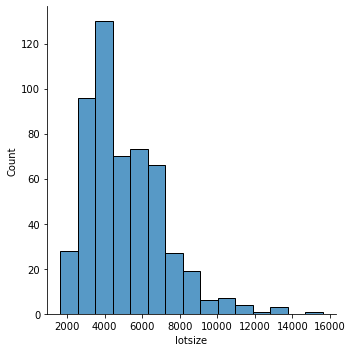

In [40]:
sns.displot(x='lotsize', data= df, bins=15 )
print(df['lotsize'].median())
print(df['lotsize'].max())
print(df['lotsize'].min())
print(df['lotsize'].mean())
print("lotsize feature seems to be skewed....")

### Compute skewness
print(df['lotsize'].skew())
print("lotsize feature is right skewed....")

0.112516136720141


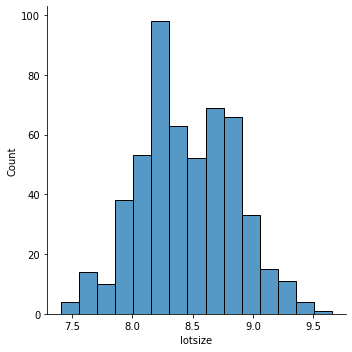

In [41]:
lotsize_log = np.log(df['lotsize'] + 1)
print(lotsize_log.skew())
sns.displot(x=lotsize_log,bins=15)
df['lotsize'] = lotsize_log
# sns.displot(x='lotsize', data= df, bins=15 )

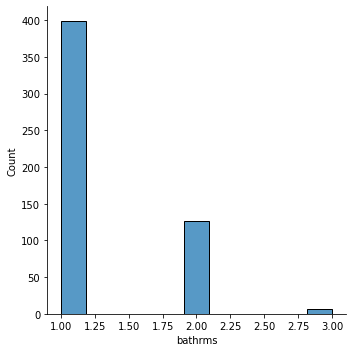

In [42]:
# print("Following features are moderately skewed")
sns.displot(x='bathrms', data= df )   # moderately

Following features are symmetric


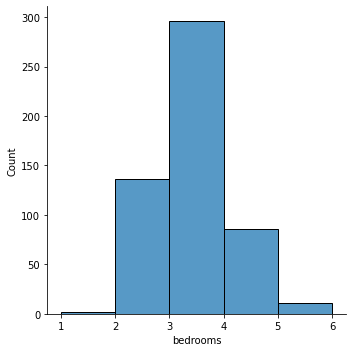

In [43]:
print("Following features are symmetric")
sns.displot(x='bedrooms', data= df, bins=5)

### Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [45]:
print(df['lotsize'].max(), df['lotsize'].min())

9.65509029374725 7.409136443920128


In [46]:
print(df['bathrms'].max(), df['bathrms'].min())

3 1


In [47]:
print(df['price'].max(), df['price'].min())

130000.0 25000.0


In [48]:
### Using MinMaxScaler() for Min Max Scaling

# scaler=MinMaxScaler(feature_range=(-1,1))   # a=-1, b=1
# scaler=MinMaxScaler(feature_range=(0,10))   # a=0, b=10

scaler = MinMaxScaler()   # a=0, b=1
column_list = ['bathrms','bedrooms','lotsize']
X = df[ column_list ]
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=column_list)
print(X_scaled[0:10,:])
X_scaled_df.head()

df.update(X_scaled_df[ column_list ])

[[0.         0.4        0.56333812]
 [0.         0.2        0.39411458]
 [0.         0.4        0.27487675]
 [0.         0.4        0.62039835]
 [0.         0.2        0.6005486 ]
 [0.         0.4        0.41157313]
 [0.5        0.4        0.38055621]
 [0.         0.4        0.41157313]
 [0.         0.4        0.47527382]
 [0.5        0.4        0.5358742 ]]


In [49]:
X_scaled_df

,bathrms,bedrooms,lotsize
0,0.0,0.4,0.563338
1,0.0,0.2,0.394115
2,0.0,0.4,0.274877
3,0.0,0.4,0.620398
4,0.0,0.2,0.600549
...,...,...,...
526,0.0,0.6,0.724400
527,0.0,0.2,0.606113
528,0.0,0.6,0.708210
529,0.0,0.4,0.625060


In [50]:
df [column_list]

,bathrms,bedrooms,lotsize
0,0.0,0.4,0.563338
1,0.0,0.2,0.394115
2,0.0,0.4,0.274877
3,0.0,0.4,0.620398
4,0.0,0.2,0.600549
...,...,...,...
541,1.0,4.0,9.036106
542,1.0,2.0,8.770439
543,1.0,4.0,8.999743
544,1.0,3.0,8.812992


In [51]:
y1 = df['price']

In [52]:
# (A) Min-Max Scaling (a and b may be assigned by us)
a = 0
b = 1
y1_new = a + ( (y1 - min(y1))/(max(y1)-min(y1)) * (b-a) )
print(y1_new.max())
print(y1_new.min())
# df['price'] = y1_new  ### Commented for now
y1_new

1.0
0.0


0      0.161905
1      0.128571
2      0.233333
3      0.338095
4      0.342857
         ...   
541    0.380952
542    0.408571
543    0.414286
544    0.428571
545    0.433333
Name: price, Length: 531, dtype: float64

In [53]:
# (A) Min-Max Scaling (a=0, b=1)
y1_new = (y1-min(y1))/(max(y1)-min(y1))
print(y1_new.max())
print(y1_new.min())
# df['Fare'] = y1_new
y1_new

1.0
0.0


0      0.161905
1      0.128571
2      0.233333
3      0.338095
4      0.342857
         ...   
541    0.380952
542    0.408571
543    0.414286
544    0.428571
545    0.433333
Name: price, Length: 531, dtype: float64

In [54]:
# (B) Mean Normalization
y1_new = (y1-np.mean(y1))/(max(y1)-min(y1))
print(y1_new.max())
print(y1_new.min())
print(np.mean(y1_new))
y1_new

0.6118627567034346
-0.38813724329656535
-6.967642616880103e-17


0     -0.226232
1     -0.259566
2     -0.154804
3     -0.050042
4     -0.045280
         ...   
541   -0.007185
542    0.020434
543    0.026148
544    0.040434
545    0.045196
Name: price, Length: 531, dtype: float64

In [55]:
# (C) Standardization (Z-score Normalization)
y1_new = (y1-np.mean(y1))/np.std(y1)
print(y1_new.max())
print(y1_new.min())
print(np.mean(y1_new))   ### Value close to 0
print(np.std(y1_new))   ### Value close to 1

2.8215437881339356
-1.7898560024591648
4.0091387000352874e-17
1.0000000000000002


In [56]:
# (D) Robust Scaling
q1 = np.quantile(df['price'], 0.25)
q3 = np.quantile(df['price'], 0.75)
print(q1,q3)
IQR = q3-q1
IQR
y1_new = (y1-np.median(y1))/IQR
print(y1_new.max())
print(y1_new.min())

49000.0 80000.0
2.225806451612903
-1.1612903225806452


In [57]:
## Make a choice of proper Scaling method

### Data Encoding using Classes for Encoding from sklearn.preprocessing

In [58]:
print(df['recroom'].value_counts())
df.head()

no     438
yes     93
Name: recroom, dtype: int64


,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,0.563338,0.4,0.0,2,yes,no,yes,no,no,1,no
1,38500.0,0.394115,0.2,0.0,1,yes,no,no,no,no,0,no
2,49500.0,0.274877,0.4,0.0,1,yes,no,no,no,no,0,no
3,60500.0,0.620398,0.4,0.0,2,yes,yes,no,no,no,0,no
4,61000.0,0.600549,0.2,0.0,1,yes,no,no,no,no,0,no


### Label Encoding applied to our column in dataset

In [59]:
from sklearn.preprocessing import LabelEncoder

print(df['recroom'].unique())

rec_encoder = LabelEncoder()
print(df['recroom'])

rec_encoder = rec_encoder.fit(df['recroom']) ### Mapping Table created
rec_values = rec_encoder.transform(df['recroom'])
### Re-assign encoded values to the 'Sex' column
df['recroom'] = rec_values

print(df['recroom'])

print(rec_encoder.classes_)
# rec_values
# df

['no', 'yes']
Categories (2, object): ['no', 'yes']
0       no
1       no
2       no
3      yes
4       no
      ... 
541     no
542     no
543     no
544     no
545     no
Name: recroom, Length: 531, dtype: category
Categories (2, object): ['no', 'yes']
0      0
1      0
2      0
3      1
4      0
      ..
541    0
542    0
543    0
544    0
545    0
Name: recroom, Length: 531, dtype: int32
['no' 'yes']


In [60]:
print("The inverse from the encoding for ", rec_values[:5], ' Last five values ' )
print("The inverse from the encoding result:", rec_encoder.inverse_transform(rec_values[:5]))

The inverse from the encoding for  [0 0 0 1 0]  Last five values 
The inverse from the encoding result: ['no' 'no' 'no' 'yes' 'no']


### OneHot Encoding applied to our column in dataset

In [61]:
df['fullbase']

0      yes
1       no
2       no
3       no
4       no
      ... 
541     no
542     no
543    yes
544     no
545     no
Name: fullbase, Length: 531, dtype: category
Categories (2, object): ['no', 'yes']

In [62]:
# print(df.iloc[ [0:5],  ['fullbase'] ])
print(pd.get_dummies(df['fullbase']))

     no  yes
0     0    1
1     1    0
2     1    0
3     1    0
4     1    0
..   ..  ...
541   1    0
542   1    0
543   0    1
544   1    0
545   1    0

[531 rows x 2 columns]


In [63]:
cat_col_list = ['fullbase','airco','gashw' ]

pd.get_dummies(df[ cat_col_list ] )


,fullbase_no,fullbase_yes,airco_no,airco_yes,gashw_no,gashw_yes
0,0,1,1,0,1,0
1,1,0,1,0,1,0
2,1,0,1,0,1,0
3,1,0,1,0,1,0
4,1,0,1,0,1,0
...,...,...,...,...,...,...
541,1,0,1,0,1,0
542,1,0,0,1,1,0
543,0,1,0,1,1,0
544,1,0,1,0,1,0


In [64]:
df

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,0.563338,0.4,0.0,2,yes,0,yes,no,no,1,no
1,38500.0,0.394115,0.2,0.0,1,yes,0,no,no,no,0,no
2,49500.0,0.274877,0.4,0.0,1,yes,0,no,no,no,0,no
3,60500.0,0.620398,0.4,0.0,2,yes,1,no,no,no,0,no
4,61000.0,0.600549,0.2,0.0,1,yes,0,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
541,65000.0,9.036106,4.0,1.0,4,yes,0,no,no,no,3,no
542,67900.0,8.770439,2.0,1.0,1,yes,0,no,no,yes,3,no
543,68500.0,8.999743,4.0,1.0,4,yes,0,yes,no,yes,2,no
544,70000.0,8.812992,3.0,1.0,1,yes,0,no,no,no,0,no


In [65]:
dummies_df = pd.get_dummies(df[ cat_col_list])


df.drop(cat_col_list, axis = 1, inplace=True)

new_cols_list = dummies_df.columns
print(new_cols_list)                        
df[new_cols_list] = dummies_df[new_cols_list].copy()                           

Index(['fullbase_no', 'fullbase_yes', 'airco_no', 'airco_yes', 'gashw_no',
       'gashw_yes'],
      dtype='object')


In [66]:
df.shape

(531, 15)

### Ordinal Encoding applied to our column in dataset

Important Note: 
Actually, SCALING may be done/not should be applied for every numeric feature of dataset (particularly if their range varies a lot), when working on DATA SCIENCE PROJECT depending on ML algorithm to be used further .

Also, ENCODING needs to be done for each and every categorical(non-numeric) feature, when working on DATA SCIENCE PROJECT.


In [67]:
from sklearn.preprocessing import OrdinalEncoder


In [68]:
print(df['prefarea'].unique())
df['prefarea'] = df['prefarea'].astype('object')

['no' 'yes']


In [69]:
df['prefarea']

0      no
1      no
2      no
3      no
4      no
       ..
541    no
542    no
543    no
544    no
545    no
Name: prefarea, Length: 531, dtype: object

In [70]:
mapping = {"no":1, "yes":0 }
# mapping = {'most likely':5, 'more likely':4, 'likely':3, 'less likely':2, 'least likely':1}

In [71]:
df["prefarea"] = df["prefarea"].map(mapping)
# df["new_driveway"] = df["driveway"].replace(mapping)

In [72]:
df['prefarea']

0      1
1      1
2      1
3      1
4      1
      ..
541    1
542    1
543    1
544    1
545    1
Name: prefarea, Length: 531, dtype: int64

In [73]:
df

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,garagepl,prefarea,fullbase_no,fullbase_yes,airco_no,airco_yes,gashw_no,gashw_yes
0,42000.0,0.563338,0.4,0.0,2,yes,0,1,1,0,1,1,0,1,0
1,38500.0,0.394115,0.2,0.0,1,yes,0,0,1,1,0,1,0,1,0
2,49500.0,0.274877,0.4,0.0,1,yes,0,0,1,1,0,1,0,1,0
3,60500.0,0.620398,0.4,0.0,2,yes,1,0,1,1,0,1,0,1,0
4,61000.0,0.600549,0.2,0.0,1,yes,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,65000.0,9.036106,4.0,1.0,4,yes,0,3,1,1,0,1,0,1,0
542,67900.0,8.770439,2.0,1.0,1,yes,0,3,1,1,0,0,1,1,0
543,68500.0,8.999743,4.0,1.0,4,yes,0,2,1,0,1,0,1,1,0
544,70000.0,8.812992,3.0,1.0,1,yes,0,0,1,1,0,1,0,1,0


In [74]:
### Simple Similar example for Ordinal encoding

mydata = pd.DataFrame({
    'Education': ['High School','High School', 'Bachelor', 'Master', 'PhD', 'Associate','PhD','High School','Primary School']
})

custom_mapping = {
    'Primary School' : 0,
    'High School': 1,
    'Associate': 2,
    'Bachelor': 3,
    'Master': 4,
    'PhD': 5
}


mydata['Encoded_Education'] = mydata['Education'].map(custom_mapping)

print(mydata)

        Education  Encoded_Education
0     High School                  1
1     High School                  1
2        Bachelor                  3
3          Master                  4
4             PhD                  5
5       Associate                  2
6             PhD                  5
7     High School                  1
8  Primary School                  0
